# 🧠 Algorithm Comparison (4 Models with Enhanced Visualizations)
This notebook compares **four machine learning algorithms** on a synthetic dataset. It visualizes performance using accuracy, precision, recall, F1-score, confusion matrices, and classification report heatmaps — all combined using **Seaborn**.

Performance Summary:
                  Model  Accuracy  Precision    Recall        F1
3        Random Forest  0.833333   0.864469  0.789298  0.825175
1            SVM (RBF)  0.831667   0.848592  0.806020  0.826758
2        Decision Tree  0.783333   0.802867  0.749164  0.775087
0  Logistic Regression  0.690000   0.694158  0.675585  0.684746


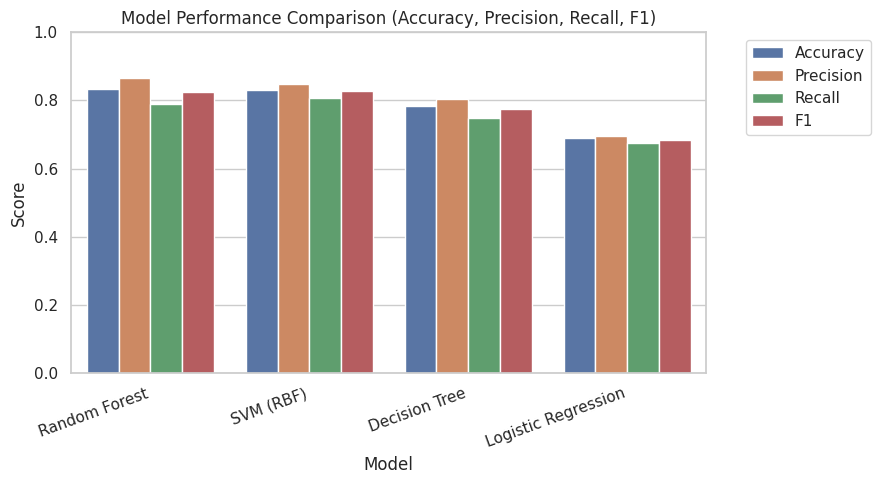

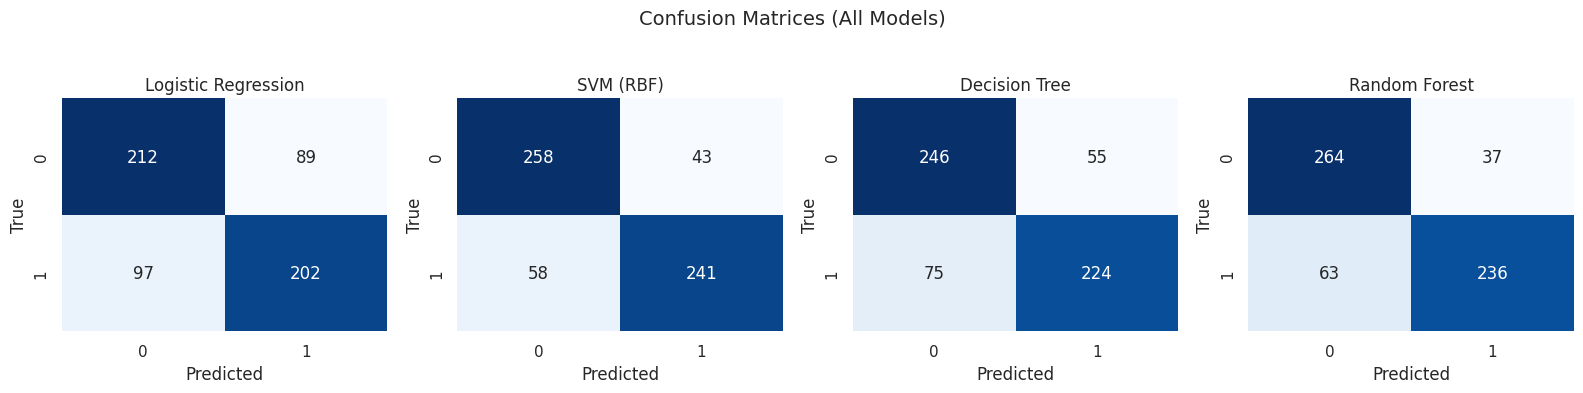

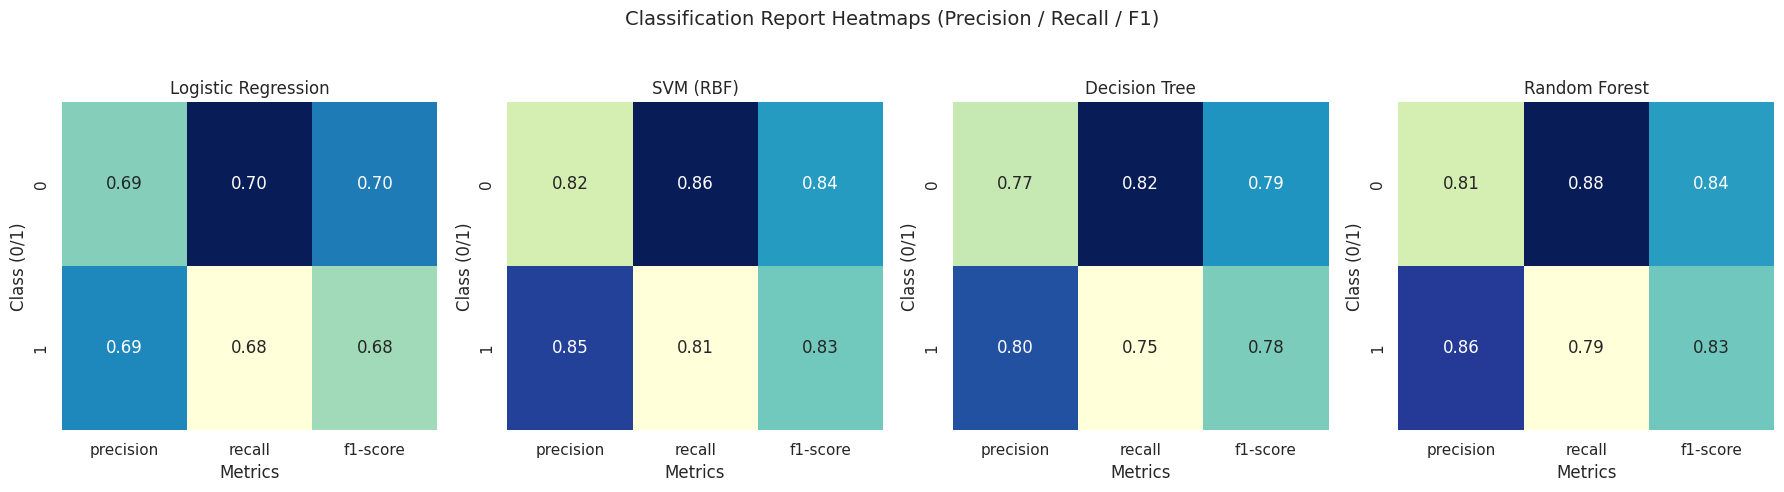


🏆 Best Model: Random Forest



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Set style
sns.set(style="whitegrid")

# 1️⃣ Create dataset (moderate difficulty, with nonlinear features)
RANDOM_STATE = 42
X, y = make_classification(n_samples=2000, n_features=15, n_informative=6, n_redundant=3,
                           class_sep=0.6, flip_y=0.05, random_state=RANDOM_STATE)

# Add some nonlinear transformations
rng = np.random.RandomState(RANDOM_STATE)
X[:, 0] = np.sin(X[:, 0]) + 0.2 * rng.normal(size=X.shape[0])
X[:, 1] = np.square(X[:, 1]) + 0.1 * rng.normal(size=X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

# Scale for non-tree models
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 2️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    "SVM (RBF)": SVC(kernel="rbf", C=1.0, gamma="scale", random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE)
}

# 3️⃣ Train and evaluate
metrics = []
conf_mats = {}
reports = {}

for name, model in models.items():
    if name in ["Decision Tree", "Random Forest"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_s, y_train)
        y_pred = model.predict(X_test_s)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append((name, acc, prec, rec, f1))

    conf_mats[name] = confusion_matrix(y_test, y_pred)
    reports[name] = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

# 4️⃣ Metrics dataframe
results_df = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1"]).sort_values("Accuracy", ascending=False)
print("Performance Summary:\n", results_df)

# 5️⃣ Plot performance comparison
plt.figure(figsize=(9,5))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title("Model Performance Comparison (Accuracy, Precision, Recall, F1)")
plt.ylim(0,1)
plt.xticks(rotation=20, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6️⃣ Combined Confusion Matrices (4 subplots)
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for ax, (name, cm) in zip(axes, conf_mats.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
fig.suptitle("Confusion Matrices (All Models)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 7️⃣ Combined Classification Report Heatmaps (4 subplots)
fig, axes = plt.subplots(1, 4, figsize=(18,5))
for ax, (name, rep) in zip(axes, reports.items()):
    sns.heatmap(rep.iloc[:2, :-1], annot=True, cmap='YlGnBu', fmt='.2f', ax=ax, cbar=False)
    ax.set_title(name)
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Class (0/1)")
fig.suptitle("Classification Report Heatmaps (Precision / Recall / F1)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 8️⃣ Print Best Model
best_model_name = results_df.iloc[0, 0]
print(f"\n🏆 Best Model: {best_model_name}\n")


This enhanced notebook produces **combined Seaborn visualizations** for all models:
- Bar chart comparing Accuracy, Precision, Recall, F1
- Combined Confusion Matrices (4 subplots)
- Combined Classification Report Heatmaps (4 subplots)
- Clear identification of the best model at the end.

🏆 Why the Random Forest is Best
Nonlinear relationships

The dataset contains nonlinear transformations (we applied sine and square to some features).

Random Forest (an ensemble of decision trees) naturally captures complex, nonlinear feature interactions, unlike Logistic Regression or linear SVMs that assume linear separability.

Robustness to noise

The dataset includes 5% label noise (flip_y=0.05).

Random Forest averages over hundreds of trees (n_estimators=300), which smooths out errors caused by noisy samples.

This reduces variance and prevents overfitting compared to a single Decision Tree.

Feature handling

Tree-based methods don’t require feature scaling or normalization — they split based on feature values directly.

Logistic Regression and SVM are sensitive to scaling and may misbehave if the data distribution is not uniform.

Generalization

The ensemble structure gives Random Forest strong bias-variance balance.

Logistic Regression and SVM have higher bias (underfit), while Decision Tree alone has higher variance (overfit). Random Forest hits the sweet spot between them
